# Multi Source Plots

## Load libraries and files

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn


from pathlib import Path

from matplotlib import pyplot as plt

# Print information about the current working directory
print(os.getcwd())

/home/kevin/DPhil/Projects/EHR-Indication-Processing/03_Evaluation


In [7]:
data_path = Path("../00_Data/export")

model_name = "Bio_ClinicalBERT"

bert_predictions_path = data_path/f"{model_name}_predictions.csv"
bert_true_path = data_path/f"{model_name}_true_labels.csv"

bert_true = pd.read_csv(bert_true_path)
bert_predictions = pd.read_csv(bert_predictions_path)

# Set indicies
bert_true = bert_true.set_index('IndicationRaw')
bert_predictions = bert_predictions.set_index(bert_true.index)

# Convert to booleans
bert_true = bert_true.astype(bool)
bert_predictions = bert_predictions.astype(bool)

## Re-shape the data

In [41]:
# Remove uncertainty column & filter for multiple indication source
data_sets = {
    "reference": bert_true,
    "predicted": bert_predictions
}

data_sets_multi = {}

# Run over all datasets
for data_key, data_set in data_sets.items():
    tmp_data = data_set.drop(columns=["uncertainty"])
    data_sets_multi[data_key] = tmp_data[tmp_data.sum(axis=1) > 1]

bert_true_multi = data_sets_multi["reference"]
bert_predictions_multi = data_sets_multi["predicted"]

In [42]:
label_list = bert_predictions_multi.columns

In [33]:
label_list = []

for col_name in bert_predictions_multi.columns:
    col_name_pretty = " ".join([col_token.capitalize() for col_token in col_name.split("_")])
    label_list.append(col_name_pretty)

## UpSetPlots

In [44]:
import upsetplot
from upsetplot import from_indicators, UpSet

bert_predictions_multi_count = from_indicators(label_list, data=bert_predictions_multi)
bert_true_multi_count = from_indicators(label_list, data=bert_true_multi)


Text(0.5, 1.0, 'Intersecions of resistances and number of ocurrences - All')

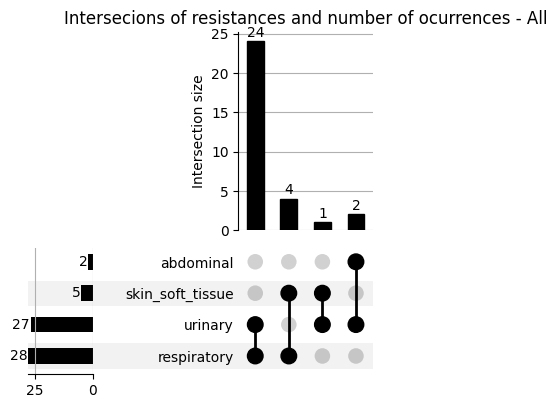

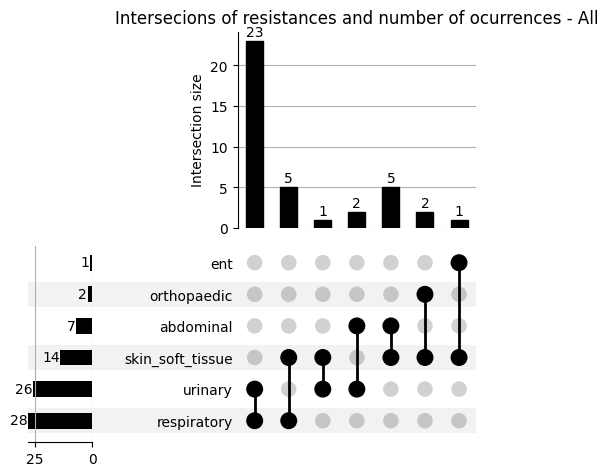

In [45]:
upsetplot.plot(data_intersection_count, show_counts=True)
plt.title('Intersecions of resistances and number of ocurrences - All')

upsetplot.plot(bert_true_multi_count, show_counts=True)
plt.title('Intersecions of resistances and number of ocurrences - All')